# Mobile_price Analysis - Statistical Hypothesis Testing


## **1. Load the Dataset**
- Import necessary libraries
- Read the CSV/Excel file into a DataFrame


## **2. Explore Dataset Structure**
- `info()` – data types & missing values  
- `describe()` – summary statistics (numerical columns)


## **3. Column Classification**
### **Categorical Columns**
- **Nominal:** No order  
- **Ordinal:** Ordered categories  

### **Numerical Columns**
- **Continuous:** Measured values  
- **Discrete:** Whole-number counts  

## **4. Count Unique Values**
- Use `nunique()` for categorical columns  
- Helps understand category depth


## **5. Handle Missing Values**
### **Categorical Columns**
- Fill using **mode**

### **Numerical Columns**
- Fill using **mean** or **median** (median better for skewed data)


## **6. Re-check Missing Values**
- Use `isnull().sum()` to confirm all missing values are handled


## **7. Outlier Detection**
- Compute **Z-score** for continuous variables  
- Identify values beyond threshold (usually +3 -3)


## **8. Distribution Analysis**
### **Skewness** => Skewness tells us which side the data is leaning.
- Understand distribution asymmetry

### **Kurtosis** => Kurtosis tells us how heavy or light the tails are.(peak)
- Understand tail heaviness


## **9. Encode Categorical Variables**
- Apply **One-Hot Encoding** (dummy variables)
- Converts categorical → numeric for ML models


## **10. Power Transformation**
- Apply **Yeo-Johnson Transformation**
- Reduces skewness in continuous variables
- Helps normalize data

## **11. Data Visualization**
---


In [4]:
pip install numpy pandas seaborn matplotlib scipy statsmodels scikit-learn jupyter


  Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 2.1 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.6 MB 2.3 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.6 MB 2.6 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/9.6 MB 2.6 MB/s eta 0:00:03
   ------------- -------------------------- 3.1/9.6 MB 2.7 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.6 MB 2.9 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.6 MB 3.2 MB/s eta 0:00:02
   ------------------------- -------------- 6.0/9.6 MB 3.4 MB/s eta 0:00:02
   ---------------------------- ----------- 6

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [27]:
df=pd.read_csv('stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [28]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354   

In [29]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### 3. Column classification


In [30]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [35]:
print(df['gender'].unique())
print(df['age'].unique())
print(df['hypertension'].unique())
print(df['heart_disease'].unique())
print(df['ever_married'].unique())
print(df['Residence_type'].unique())
print(df['avg_glucose_level'].unique())
print(df['bmi'].unique())
print(df['smoking_status'].unique())
print(df['stroke'].unique())

['Male' 'Female' 'Other']
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 4.80e-01 1.60e-01]
[0 1]
[1 0]
['Yes' 'No']

1. id → Discrete
2. gender → Nominal
3. age → Continuous
4. hypertension → Nominal (binary)
5. heart_disease → Nominal (binary)
6. ever_married → Nominal
7. work_type → Nominal
8. Residence_type → Nominal
9. avg_glucose_level → Continuous
10. bmi → Continuous
11. smoking_status → Nominal
12. stroke → Nominal


In [39]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### 4. Count unique values

In [42]:
df.nunique()


id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

#### 5. Handle Missing Values

In [43]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Bmi -> Continuous (mean or median)

In [47]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean()).replace=True

In [48]:
df['bmi'].isnull().sum()

np.int64(0)

#### 6. Recheck Missing values

In [50]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### 7. Outliers detection

Z-score for continuous variables (age, avg_glucose_level , bmi)

In [52]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [67]:
#age

m_age=df['age'].mean()
sdev_age=df['age'].std()
for x in range(4):
    df['z_age']=(x-m_age)/sdev_age
    print((x-m_age)/sdev_age)

-1.9116123384718593
-1.8673892976113724
-1.8231662567508857
-1.7789432158903988


In [68]:
#avg_glucose_level

m_avg_glucose_level=df['avg_glucose_level'].mean()
sdev_avg_glucose_level=df['avg_glucose_level'].std()
for x in range(4):
    df['z_glucose']=(x-m_avg_glucose_level)/sdev_avg_glucose_level
    print((x-m_avg_glucose_level)/sdev_avg_glucose_level)

-2.3440665166507233
-2.321983447283503
-2.2999003779162823
-2.277817308549062


In [70]:
m = df['bmi'].mean()
sd = df['bmi'].std()

df['z_bmi'] = (df['bmi'] - m) / sd
print(df['bmi_zscore_manual'].head())


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: bmi_zscore_manual, dtype: float64


In [71]:
# from scipy.stats import zscore

# df['z_age']     = zscore(df['age'])
# df['z_glucose'] = zscore(df['avg_glucose_level'])
# df['z_bmi']     = zscore(df['bmi'])
# print(df['z_age'] )
# print(df['z_glucose'] )
# print(df['z_bmi'] )



##### Detect Outlier

In [79]:
df[df['z_age'].abs() > 3].head()
df[df['z_glucose'].abs() > 3]
df[df['z_bmi'].abs() > 3]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_zscore_manual,z_bmi,z_age,z_glucose


#### 8. Skewness and kurtosis

In [80]:
print("skewness")
df[['age', 'avg_glucose_level', 'bmi']].skew()



skewness


age                 -0.137059
avg_glucose_level    1.572284
bmi                  0.000000
dtype: float64

In [81]:
print("kurtosis")
df[['age', 'avg_glucose_level', 'bmi']].kurtosis()

kurtosis


age                 -0.991010
avg_glucose_level    1.680479
bmi                  0.000000
dtype: float64

Rule of thumb:

|skew| < 0.5 → approximately symmetric → no transformation needed

0.5 < |skew| < 1 → moderately skewed → maybe transform

|skew| > 1 → highly skewed → transformation recommended

#### 9. One - Hot Encoding

(dummy variables)
- Converts categorical → numeric for ML models

In [82]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_zscore_manual,z_bmi,z_age,z_glucose
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,True,formerly smoked,1,NaN,NaN,-1.778943,-2.277817
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,True,never smoked,1,NaN,NaN,-1.778943,-2.277817
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,True,never smoked,1,NaN,NaN,-1.778943,-2.277817


In [83]:
df_gender = pd.get_dummies(df['gender'], dtype=int, drop_first=True)
df = pd.concat([df, df_gender], axis=1).drop(['gender'], axis=1)
df.columns


Index(['id', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_zscore_manual', 'z_bmi', 'z_age',
       'z_glucose', 'Male', 'Other'],
      dtype='object')

In [84]:
df_married = pd.get_dummies(df['ever_married'], dtype=int, drop_first=True)
df = pd.concat([df, df_married], axis=1).drop(['ever_married'], axis=1)
df.columns


Index(['id', 'age', 'hypertension', 'heart_disease', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke', 'bmi_zscore_manual', 'z_bmi', 'z_age', 'z_glucose', 'Male',
       'Other', 'Yes'],
      dtype='object')

In [85]:
df_work = pd.get_dummies(df['work_type'], dtype=int, drop_first=True)
df = pd.concat([df, df_work], axis=1).drop(['work_type'], axis=1)
df.columns


Index(['id', 'age', 'hypertension', 'heart_disease', 'Residence_type',
       'avg_glucose_level', 'bmi', 'smoking_status', 'stroke',
       'bmi_zscore_manual', 'z_bmi', 'z_age', 'z_glucose', 'Male', 'Other',
       'Yes', 'Never_worked', 'Private', 'Self-employed', 'children'],
      dtype='object')

In [86]:
df_smoke = pd.get_dummies(df['smoking_status'], dtype=int, drop_first=True)
df = pd.concat([df, df_smoke], axis=1).drop(['smoking_status'], axis=1)
df.columns


Index(['id', 'age', 'hypertension', 'heart_disease', 'Residence_type',
       'avg_glucose_level', 'bmi', 'stroke', 'bmi_zscore_manual', 'z_bmi',
       'z_age', 'z_glucose', 'Male', 'Other', 'Yes', 'Never_worked', 'Private',
       'Self-employed', 'children', 'formerly smoked', 'never smoked',
       'smokes'],
      dtype='object')

In [88]:
df_res = pd.get_dummies(df['Residence_type'], dtype=int, drop_first=True)
df = pd.concat([df, df_res], axis=1).drop(['Residence_type'], axis=1)
df.columns


Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'bmi_zscore_manual', 'z_bmi', 'z_age', 'z_glucose',
       'Male', 'Other', 'Yes', 'Never_worked', 'Private', 'Self-employed',
       'children', 'formerly smoked', 'never smoked', 'smokes', 'Urban'],
      dtype='object')

In [95]:
df_res = pd.get_dummies(df['bmi'], dtype=int, drop_first=True)
df = pd.concat([df, df_res], axis=1).drop(['bmi'], axis=1)
df.columns


Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'stroke', 'bmi_zscore_manual', 'z_bmi', 'z_age', 'z_glucose', 'Male',
       'Other', 'Yes', 'Never_worked', 'Private', 'Self-employed', 'children',
       'formerly smoked', 'never smoked', 'smokes', 'Urban'],
      dtype='object')

In [110]:
df.head(3)

,id,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi_zscore_manual,z_bmi,z_age,z_glucose,...,Other,Yes,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes,Urban
0,9046,67.0,0,1,228.69,1,NaN,NaN,1.051434,2.706375,...,0,1,0,1,0,0,1,0,0,1
1,51676,61.0,0,0,202.21,1,NaN,NaN,0.786070,2.121559,...,0,1,0,0,1,0,0,1,0,0
2,31112,80.0,0,1,105.92,1,NaN,NaN,1.626390,-0.005028,...,0,1,0,1,0,0,0,1,0,0


In [111]:
df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'stroke', 'bmi_zscore_manual', 'z_bmi', 'z_age', 'z_glucose', 'Male',
       'Other', 'Yes', 'Never_worked', 'Private', 'Self-employed', 'children',
       'formerly smoked', 'never smoked', 'smokes', 'Urban'],
      dtype='object')

In [112]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi_zscore_manual,z_bmi,z_age,z_glucose,...,Other,Yes,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes,Urban
0,9046,67.0,0,1,228.69,1,NaN,NaN,1.051434,2.706375,...,0,1,0,1,0,0,1,0,0,1
1,51676,61.0,0,0,202.21,1,NaN,NaN,0.786070,2.121559,...,0,1,0,0,1,0,0,1,0,0
2,31112,80.0,0,1,105.92,1,NaN,NaN,1.626390,-0.005028,...,0,1,0,1,0,0,0,1,0,0
3,60182,49.0,0,0,171.23,1,NaN,NaN,0.255342,1.437358,...,0,1,0,1,0,0,0,0,1,1
4,1665,79.0,1,0,174.12,1,NaN,NaN,1.582163,1.501184,...,0,1,0,0,1,0,0,1,0,0


#### 10. Power Transformation |skew|>1

In [130]:
from sklearn.preprocessing import PowerTransformer

#col for transformation
cols_to_transform = ['avg_glucose_level']

pt = PowerTransformer(method='yeo-johnson')

df = df.copy()
df[cols_to_transform] = pt.fit_transform(df[cols_to_transform])

df[cols_to_transform].head()


,avg_glucose_level
0,1.812638
1,1.661263
2,0.414050
3,1.421214
4,1.447420


In [131]:
df[cols_to_transform].skew()


avg_glucose_level   -0.014075
dtype: float64

In [132]:
print(df.head())
df.columns

      id   age  hypertension  heart_disease  avg_glucose_level  stroke  \
0   9046  67.0             0              1           1.812638       1   
1  51676  61.0             0              0           1.661263       1   
2  31112  80.0             0              1           0.414050       1   
3  60182  49.0             0              0           1.421214       1   
4   1665  79.0             1              0           1.447420       1   

   bmi_zscore_manual  z_bmi     z_age  z_glucose  ...  Other  Yes  \
0                NaN    NaN  1.051434   2.706375  ...      0    1   
1                NaN    NaN  0.786070   2.121559  ...      0    1   
2                NaN    NaN  1.626390  -0.005028  ...      0    1   
3                NaN    NaN  0.255342   1.437358  ...      0    1   
4                NaN    NaN  1.582163   1.501184  ...      0    1   

   Never_worked  Private  Self-employed  children  formerly smoked  \
0             0        1              0         0                1   


Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'stroke', 'bmi_zscore_manual', 'z_bmi', 'z_age', 'z_glucose', 'Male',
       'Other', 'Yes', 'Never_worked', 'Private', 'Self-employed', 'children',
       'formerly smoked', 'never smoked', 'smokes', 'Urban'],
      dtype='object')

#### 11. visualization

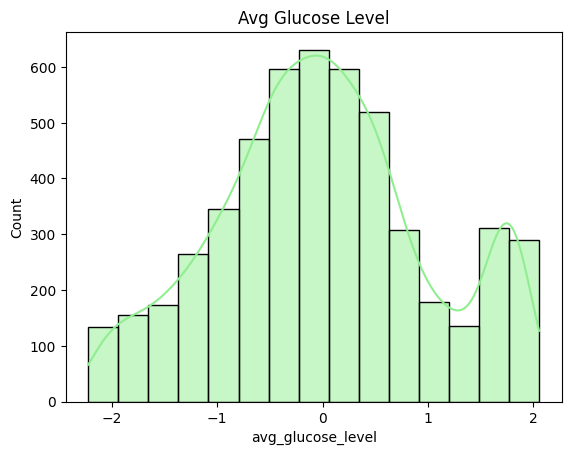

In [134]:

sns.histplot(df_transformed['avg_glucose_level'], kde=True, bins=15, color='lightgreen')
plt.title('Avg Glucose Level')

plt.show()
